#**Introduction to Unix Scripting**

Now that you know how to navigate Unix file systems and can manage both the files and directories within, we will introduce Unix scripts: executable files which contain a collection of Unix commands to be ran together.

Storing the your analyses' Unix commands within Unix scripts comes with multiple benefits. These include:

*   Being easily shareable with collaborators
*   Enabling you to conveniently run the same Unix commands on multiple files
*   Facilitating automation of your analyses

However, before we write any Unix scripts, let us first learn additional Unix commands to expand the potential of what our scripts will be able to do. 


##**Additional Unix commands and special symbols**

###**Use the `echo` command to send text as output.**

This command takes one or more arguments which must be enclosed in single or double quotations to create what is called a 'string'. 

In [ ]:
%%bash
echo "Hello World!"

Hello World!


Additional arguments are printed on the same line with a space inserted between each string argument.

In [ ]:
%%bash
echo "wordOne" "wordTwo" "wordThree"

wordOne wordTwo wordThree


###**Use the `wget` command to download a file from a direct-download link.**

The `wget` command, short for 'web get', takes at least one argument: a direct-download link surrounded by single quotations.

The `-O`, or `--output-document` option specifies what the name the downloaded file should be saved under.


In [ ]:
%%bash
wget -O example.txt 'https://drive.google.com/uc?export=download&id=1JqblHOsp5LWQ9zBki6Ra0AspQQVOMO9W'

--2022-01-13 17:27:41--  https://drive.google.com/uc?export=download&id=1JqblHOsp5LWQ9zBki6Ra0AspQQVOMO9W
Resolving drive.google.com (drive.google.com)... 142.250.157.113, 142.250.157.139, 142.250.157.138, ...
Connecting to drive.google.com (drive.google.com)|142.250.157.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/opnus7ep2aked5p81i4c59sh0uo4l0rf/1642094850000/06194299299598647526/*/1JqblHOsp5LWQ9zBki6Ra0AspQQVOMO9W?e=download [following]
--2022-01-13 17:27:41--  https://doc-0o-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/opnus7ep2aked5p81i4c59sh0uo4l0rf/1642094850000/06194299299598647526/*/1JqblHOsp5LWQ9zBki6Ra0AspQQVOMO9W?e=download
Resolving doc-0o-1g-docs.googleusercontent.com (doc-0o-1g-docs.googleusercontent.com)... 108.177.125.132, 2404:6800:4008:c01::84
Connecting to doc-0o-1g-docs.googleusercontent.com (d

To keep your Colab notebooks cleaner, we can reduce the amount of text printed during downloads with the `-nv`, or `--no-verbose` option.

In [ ]:
%%bash
wget -nv -O example.txt 'https://drive.google.com/uc?export=download&id=1JqblHOsp5LWQ9zBki6Ra0AspQQVOMO9W'

2022-01-13 17:27:42 URL:https://doc-0o-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/opnus7ep2aked5p81i4c59sh0uo4l0rf/1642094850000/06194299299598647526/*/1JqblHOsp5LWQ9zBki6Ra0AspQQVOMO9W?e=download [146/146] -> "example.txt" [1]


Alternatively, you can silence the download message entirely by adding `&>/dev/null` at the end of the command. This additon causes any messages created by this command to be discarded. 

In [ ]:
%%bash
wget -O example.txt 'https://drive.google.com/uc?export=download&id=1JqblHOsp5LWQ9zBki6Ra0AspQQVOMO9W' &>/dev/null

###**Use the `cat`command to read and concatenate files.**

To read one file, `cat` requires the name of the file as a command line argument.

In [ ]:
%%bash
cat example.txt

This is an example text file.
It is used to teach Unix commands.
For example, the wc, head, and grep commands. 
This file has a total of 4 lines.


The name `cat` is an abbreviation of the word concatenate. As such, the primary function of `cat` is to combine two files together. 

In [ ]:
%%bash
wget -nv -O exampleTwo.txt 'https://drive.google.com/uc?export=download&id=16jP2qPOn_8ngTjyeRFEWmsv4BePKiQ7h' &>/dev/null
cat exampleTwo.txt

this is the first line of a second example file
this file can be concatenated to the first example file
after concatenation, this line will be the last line


In [ ]:
%%bash
cat exampleTwo.txt example.txt

this is the first line of a second example file
this file can be concatenated to the first example file
after concatenation, this line will be the last line
This is an example text file.
It is used to teach Unix commands.
For example, the wc, head, and grep commands. 
This file has a total of 4 lines.


To save this new file, you can add the redirection operator `>` followed by the name of the new file. 

In [ ]:
%%bash
cat example.txt exampleTwo.txt > combinedExample.txt
ls

combinedExample.txt
exampleTwo.txt
example.txt
myScript
sample_data


Note that if `combinedExample.txt` already existed, the above `>` would overwrite the existing file. 

Finally, you can confirm the contents of the new file with `cat`.

In [ ]:
%%bash
cat combinedExample.txt

This is an example text file.
It is used to teach Unix commands.
For example, the wc, head, and grep commands. 
This file has a total of 4 lines.
this is the first line of a second example file
this file can be concatenated to the first example file
after concatenation, this line will be the last line


###**Use the `wc` command to count lines, words, and characters.** 

To get counts for a string, combine the `wc` command with the `echo` command using the pipe symbol `|` as follows: 

In [ ]:
%%bash
echo "This string has 1 lines, 12 words, and 70 characters including spaces" | wc 

      1      12      70


If you only want a single of the `wc` command's statistics, you must specify so with the `-l`/`--lines`, `-w`/`--words`, or `-m`/`--chars` options.  

In [ ]:
%%bash
echo "This string has 1 lines, 12 words, and 70 characters including spaces" | wc -l

1


In [ ]:
%%bash
echo "This string has 1 lines, 12 words, and 70 characters including spaces" | wc -w 

12


In [ ]:
%%bash
echo "This string has 1 lines, 12 words, and 70 characters including spaces" | wc -m 

70


To conceptualize what just occured you may imagine the following. 

There is a literal pipe connecting the `echo` and `wc` commands. Then, running the `echo` command sends text down the pipe into the `wc command. Finally, the `wc` command is run using the text as input. 

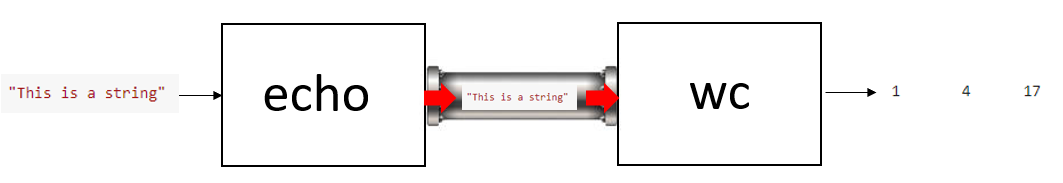

Here, you can better see why the `echo` command is called echo: it echoes out whatever string is given to it.  


In addition to accepting strings as input, the `wc` command can also be given the name of a file as an argument to generate statistics for that file. 

In [ ]:
%%bash
cat combinedExample.txt

This is an example text file.
It is used to teach Unix commands.
For example, the wc, head, and grep commands. 
This file has a total of 4 lines.
this is the first line of a second example file
this file can be concatenated to the first example file
after concatenation, this line will be the last line


In [ ]:
%%bash
wc combinedExample.txt

  7  58 303 combinedExample.txt


Based on this, you can tell the file `combinedExample.txt` has 7 lines, 58 words, and 306 characters. 

###**Search for specific words or characters with `grep`.**

`grep` is a command you can use whenever you need to know whether a file contains a specific word or character. When used, it will output the lines of the file that contain the specified string. 

To use `grep`, provide a string as the first arguement and the name of a file as the second argument. Below is a file to practice `grep` with.



In [ ]:
%%bash
cat combinedExample.txt

This is an example text file.
It is used to teach Unix commands.
For example, the wc, head, and grep commands. 
This file has a total of 4 lines.
this is the first line of a second example file
this file can be concatenated to the first example file
after concatenation, this line will be the last line


**Find all lines that have the word 'this'.**

In [ ]:
%%bash
grep "this" combinedExample.txt 

this is the first line of a second example file
this file can be concatenated to the first example file
after concatenation, this line will be the last line


Notice how the first and fourth lines were excluded from the file. This is becuase the `grep` is case sensitive by default.

If you want to find the occurances of 'This' with a capital T instead, run the following:

In [ ]:
%%bash
grep "This" combinedExample.txt 

This is an example text file.
This file has a total of 4 lines.


Alternatively, you can change `grep` from case sensitive to case insensitive with the `-i`/`--ignore-case` option.

In [ ]:
%%bash
grep -i "this" combinedExample.txt 

This is an example text file.
This file has a total of 4 lines.
this is the first line of a second example file
this file can be concatenated to the first example file
after concatenation, this line will be the last line


Additionally, you can restrict `grep`'s search results based on string position using the `^` and `$` anchor symbols. 

The `^` anchor is used to specify lines with the target string at the beginning of the line. In turn, the `$` anchor is used to find lines where the target string is at the very end.

In [ ]:
%%bash
grep "^this" combinedExample.txt 

this is the first line of a second example file
this file can be concatenated to the first example file


Notice how searching for 'this' only yields two lines instead of three now. That is because the 'this' in the line `after concatenation, this line will be the last line.` is in the middle of the line, not its start. 

Likewise, lines that end in 'file' can be found as follows:

In [ ]:
%%bash
grep "file$" combinedExample.txt 

this is the first line of a second example file
this file can be concatenated to the first example file


This addition of symbols to a string in both of these example creates what are known as 'regular expressions'. Generally speaking, regular expression are strings that contain addtional symbols to specify certain aspects about it. 

`grep`'s compatibility with these regular expressions is what gives it its name: Global Regular Expression Print. 

##**Creating and running Unix scripts**

A key part of Unix scripts that distinguishes them from other files is that  the first line of every Unix script starts with the incantation `#!/bin/bash` or an equivalent. `#!/bin/bash` tells most any computer to execute the commands that follow in a Bash shell.   

###**Write a Unix script containing the `echo` command with `cat >` .**

Like before, the `cat` command can be used with `>` to save a file. However unlike the previously introduced usage, excluding the arguments before `>` can be used to write text to files. 

Specifically, any text below the `cat >` line will be saved to the new file.  


In [ ]:
%%bash
cat > myScript
#!/bin/bash
echo "Hello World!"

You can then use `cat` again to verify the contents of the new file. 

In [ ]:
%%bash
cat myScript

#!/bin/bash
echo "Hello World!"


###**Make a file executable with `chmod`.**

Before you can run the file `myScript`, you must first turn the file from a read/write-only file to an executable one. 

You can verify that myScript is non-executable by using `ls` with the `-l` option to output the long version of a directory's content list.

In [ ]:
%%bash
ls -l

total 20
-rw-r--r-- 1 root root  303 Jan 13 17:27 combinedExample.txt
-rw-r--r-- 1 root root  157 Jan 13 17:27 exampleTwo.txt
-rw-r--r-- 1 root root  146 Jan 13 17:27 example.txt
-rw-r--r-- 1 root root   32 Jan 13 17:27 myScript
drwxr-xr-x 1 root root 4096 Jan  7 14:33 sample_data


Here, you can tell that the file `myScript` is non-executable because the character circled in red below is not an `x`, which stands for executable. 

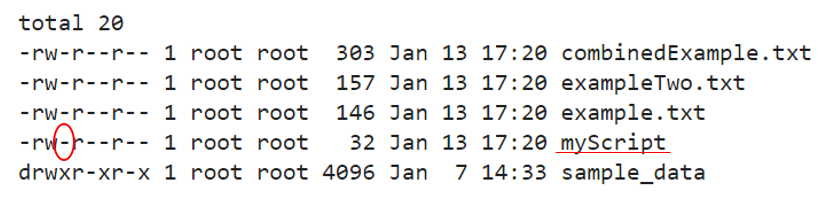

We can change this with the `chmod` command using two arguments: first the permissions to change, and second the name of the file to change permissions for.

Below, we use `u+x` as the first argument to change to give oneself, the User, permission to eXecute the file specified in the second argument.

In [ ]:
%%bash
chmod u+x myScript

Using `ls -l` again, we can see that `myScript` is now executable.

In [ ]:
%%bash
ls -l

total 20
-rw-r--r-- 1 root root  303 Jan 13 17:27 combinedExample.txt
-rw-r--r-- 1 root root  157 Jan 13 17:27 exampleTwo.txt
-rw-r--r-- 1 root root  146 Jan 13 17:27 example.txt
-rwxr--r-- 1 root root   32 Jan 13 17:27 myScript
drwxr-xr-x 1 root root 4096 Jan  7 14:33 sample_data


This change is highlighted here with a red circle.

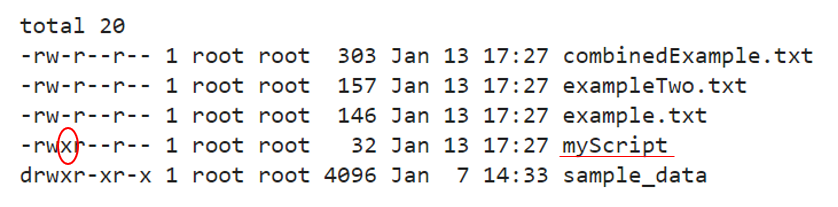

###**Run a Unix script with the `./` prefix.**

Finally, to run a Unix script, type the prefix `./` followed by the name of your executable script file. 

In [ ]:
%%bash
./myScript

Hello World!


Here, `./myScript` is what is known as the relative path where the period `.` signifies the current directory. 

It is also possible to run your script using the absolute path to your Unix script as follows.

In [ ]:
%%bash
/content/myScript

Hello World!


##**Additional special symbols and words in Unix**

So far, you have already been introduced to the redirection operator `>`, piping operator `|`, and the regular expression anchors `^` and `$`. 

Yet to complete this assignment, we will also need to introduce another redirection operator `>>`, the Unix wildcard symbol `*`, the variable prefix `$`, and the syntax for `for` loops. 

###**Append to a file with the `>>` operator.**

As described before, the `>` redirection operator will overwrite a file if it already exists. If you instead want to append text to an existing file, you can use the `>>` operator as follows.

In this example, we will first create a practice .txt file with `cat`.

In [ ]:
%%bash
cat > apprendPractice.txt
This file has 1 line.

Next, we can append a new line to that file with the `>>` operator.

In [ ]:
%%bash
cat >> apprendPractice.txt
This file has 2 lines.

You can confirm that this executed successfully with `cat`. 

In [ ]:
%%bash
cat apprendPractice.txt

This file has 1 line.
This file has 2 lines.


###**Run commands on multiple files with `for` loops and the `*` wildcard and `$` variable prefix.**

Oftentimes, datasets will comprise of multiple files. Therefore, sitautation may arise where you want to run the same Unix commands on every file in a directory.

Instead of running the commands on every file manually, it is best to construct a structure known as a `for` loop to iterate over each file as shown below. 

In [ ]:
%%bash
touch example.txt exampleTwo.txt exampleThree.txt

In [ ]:
%%bash
for file in *.txt; do
    echo "Text file found!"
    echo $file
done

Text file found!
apprendPractice.txt
Text file found!
combinedExample.txt
Text file found!
exampleTwo.txt
Text file found!
example.txt


#**Lab Assignment 2: Parsing FASTA files with UNIX scripts**

##**Introduction**

Nucleotide and amino acid sequence data is often stored in a format called FASTA. FASTA files will have the file extension `.fasta` or `.fa` and each entry in FASTA format comprises of two parts: a header and a sequence. 

FASTA header lines are used to record any number of details about a sequence. Such details can include sequence accession numbers, the organism of origin, gene names, sequence loci indicies, etc. However, all FASTA headers have one thing in common: they all fit within a single line and begin with the `>` symbol. 

FASTA sequences are always stored after their respective headers and may take one or more lines. 

Below is an example of a FASTA entry.

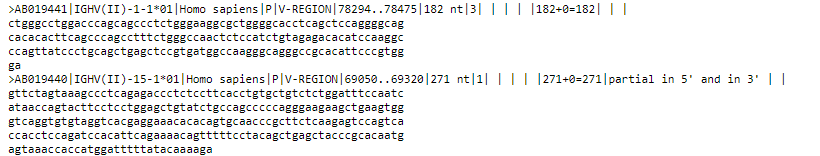


##**Instructions**

In a copy of this Colab notebook, use the commands presented in the previous sections to write a Unix script to complete the exercises below. You will be graded based on whether you can produce the correct output files. 

To start, download the files for the assignment by running the commands below:

In [ ]:
%%bash
wget -nv -O IGHJ_Mouse.fa 'https://drive.google.com/uc?export=download&id=19OjK8m9M9WwUZpB-5FLSu7RWeQhRbYKO'
wget -nv -O IGHJ_Human.fa 'https://drive.google.com/uc?export=download&id=1kUzbiYfBOYQDXUaUzJ4NEGJN9ysPulBz'
wget -nv -O IGHJ_Zebrafish.fa 'https://drive.google.com/uc?export=download&id=1m0VB08CBfl6GZ9rfCtmDyh6PI7elHcak'

2022-01-13 17:44:16 URL:https://doc-14-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f2kourtnlcpri0g92l0ll3eu8sqp2g35/1642095825000/06194299299598647526/*/19OjK8m9M9WwUZpB-5FLSu7RWeQhRbYKO?e=download [1178/1178] -> "IGHJ_Mouse.fa" [1]
2022-01-13 17:44:17 URL:https://doc-0o-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c00a4i7ekf4l69f7o2o19glst3mhhi6p/1642095825000/06194299299598647526/*/1kUzbiYfBOYQDXUaUzJ4NEGJN9ysPulBz?e=download [2639/2639] -> "IGHJ_Human.fa" [1]
2022-01-13 17:44:18 URL:https://doc-0g-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m7jo5qgckvpdshtv2hos3epiokaab8rc/1642095825000/06194299299598647526/*/1m0VB08CBfl6GZ9rfCtmDyh6PI7elHcak?e=download [1034/1034] -> "IGHJ_Zebrafish.fa" [1]


1) Create a Unix script named `headerExtractor` to extract the FASTA headers from all files and save them in a file called `headers.txt.`

2) Create a Unix script named `seqMeasurer` to extract both FASTA headers and sequences lengths from all files and save them in a file called `lengths.txt.`

Each FASTA file should have an entry in `lengths.txt`.
The format of each entry in `lengths.txt` is as follows:
*   Multiple lines with the FASTA headers for a file
*   On its own line, the sum of the nucleotides for all FASTA sequences in that file

_Hint_: Try experimenting with the `grep` commands's `-v`/ `--invert-match` option to search for string that do not match the target string or regular expression.